In [1]:
#import the libraries
import re
import seaborn as sns
import numpy.random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [2]:
df=pd.read_csv('spambase 2.csv',index_col=0)

In [3]:
df.head()

,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,,,,,,,,,,,,,,,,,,,,,
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
# Giving column names for the spambase dataset
column_names = [
    'word_freq_make', 
    'word_freq_address',
    'word_freq_all',
    'word_freq_3d',
    'word_freq_our',
    'word_freq_over',
    'word_freq_remove',
    'word_freq_internet',
    'word_freq_order',
    'word_freq_mail',
    'word_freq_receive',
    'word_freq_will',
    'word_freq_people',
    'word_freq_report',
    'word_freq_addresses',
    'word_freq_free',
    'word_freq_business',
    'word_freq_email',
    'word_freq_you',
    'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'is_spam'
]

#Load Dataset
df=pd.read_csv('spambase 2.csv',header=None,names=column_names)

# Print the first few rows of the dataset
df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
#Read data in the dataset
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
#Check for null values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [8]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [9]:
#Drop duplicate values
data = df.drop_duplicates()

In [10]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


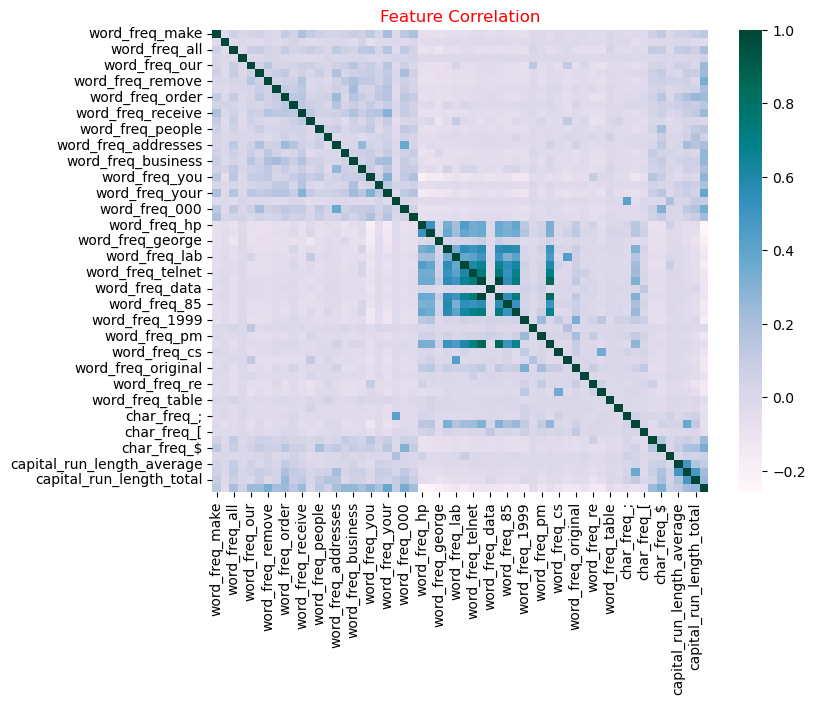

In [11]:
#Plot the feature corelation graph
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='PuBuGn')
plt.title('Feature Correlation', color='r')
plt.show()

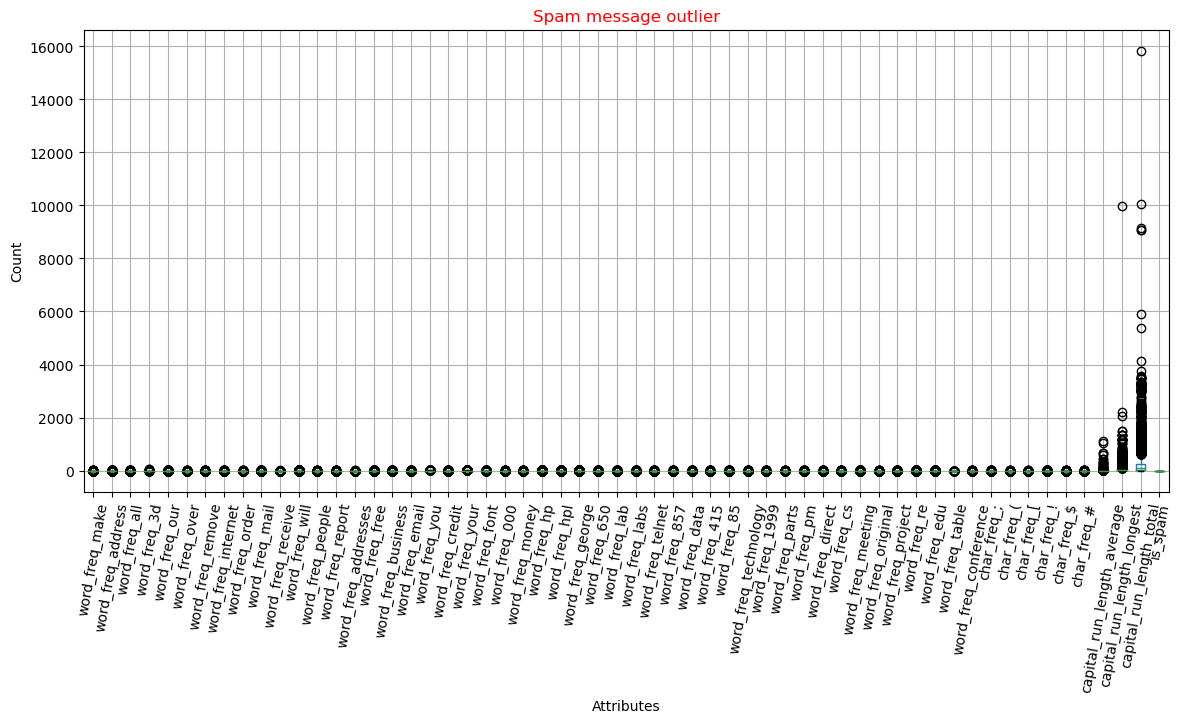

In [12]:
#Plot the outliers table 
plt.figure(figsize = (14,6))
chart = df.boxplot()
chart.set_xticklabels(chart.get_xticklabels(), rotation = 80)
plt.title("Spam message outlier", color ='red')
plt.xlabel('Attributes')
plt.ylabel('Count')
plt.show()

In [13]:
#Check for spam and no spam count
df['is_spam'].value_counts()

0    2788
1    1813
Name: is_spam, dtype: int64

In [14]:
#Set 0 as no spam and spam as emails as 1 
df.is_spam[df['is_spam'] == 1] ='spam'
df.is_spam[df['is_spam'] == 0] ='No spam'
df.head(10)

C:\Users\Yujith\AppData\Local\Temp\ipykernel_17052\2400286338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.is_spam[df['is_spam'] == 1] ='spam'


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,spam
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,spam
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,spam
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,spam
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,spam


In [15]:
#Using Inter quartile range method setting the outliers as null values
for outlier in ["capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]:
    quart75, quart25 = np.percentile(data.loc[:,outlier], [75,25])
    IQR = quart75 - quart25
    max = quart75 + (1.5 * IQR)
    min = quart25 - (1.5 * IQR)
    data.loc[data[outlier] < min, outlier] = np.nan
    data.loc[data[outlier] > max, outlier] = np.nan  

C:\Users\Yujith\AppData\Local\Temp\ipykernel_17052\4292382827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[outlier] < min, outlier] = np.nan


In [16]:
#Drop null values in the dataset
newData = data.dropna()
newData = data.dropna(axis=0)

In [17]:
#reset the index values after removing the null values
newData = data.dropna().reset_index(drop=True)

In [18]:
spamData = newData
spamData

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


In [19]:
#Applying feature scaling technique
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaledData=scaler.fit_transform(spamData)

In [20]:
#Normalization of data
spamScale=pd.DataFrame(data=scaledData, index=spamData.index, columns=spamData.columns)

In [21]:
spamData.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.094779,0.092716,0.268056,0.005818,0.308175,0.085267,0.093688,0.096164,0.047841,0.201033,...,0.033385,0.147309,0.017294,0.233433,0.051662,0.033626,2.362797,18.532792,120.788160,0.324144
std,0.309801,0.474629,0.529981,0.134848,0.701947,0.281174,0.356036,0.420321,0.222685,0.581086,...,0.214935,0.244150,0.112672,0.793952,0.194241,0.459684,1.162791,18.751231,130.389669,0.468122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508500,5.000000,31.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.054000,12.000000,76.000000,0.000000
75%,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.204000,0.000000,0.237000,0.000000,0.000000,2.909000,23.000000,155.000000,1.000000
max,4.540000,14.280000,5.100000,7.070000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,6.822000,98.000000,623.000000,1.000000


In [22]:
#Apllying PCA technique
pca = PCA(n_components=3)
pcaComp = pca.fit_transform(scaledData)

In [23]:
PCAComp = pd.DataFrame(data = pcaComp, columns = ['PCA1', 'PCA2','PCA3'])

In [24]:
#Display data columns in the dataset where PCA was applied
PCAComp.head()

,PCA1,PCA2,PCA3
0,0.812098,0.291685,-0.019771
1,0.740488,0.071332,0.037102
2,0.740491,0.071324,0.037074
3,0.625274,-0.234729,0.120526
4,0.599356,-0.367848,-0.087350


In [25]:
spamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.0,0.64,0.64,0.0,0.32,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.0,0.00,0.00,0.0,1.85,0.0,0.00,1.85,0.00,0.00,...,0.0,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.0,0.00,0.00,0.0,1.92,0.0,0.00,0.00,0.00,0.64,...,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1


In [26]:
#Split data as train and test
X = spamData.drop('is_spam', axis = 1)
y = spamData['is_spam']
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [27]:
#Feature extraction
XTrain = pca.fit_transform(XTrain)
XTest = pca.fit_transform(XTest)

In [28]:
#Store train, test in arrays
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [29]:
#Building the KNN model
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(XTrain, yTrain)
    train_accuracy[i] = knn.score(XTrain, yTrain)
    test_accuracy[i] = knn.score(XTest, yTest)

In [30]:
#Building the Decision Tree model
DT = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
#Prediction
yPrediction = knn.predict(XTest)

In [32]:
#Confusionn matrix
matrix = pd.DataFrame((metrics.confusion_matrix(yTest, yPrediction)), ('Spam', 'Not spam'), ('Spam', 'Not spam'))
print(matrix)

          Spam  Not spam
Spam       395        75
Not spam    83       137


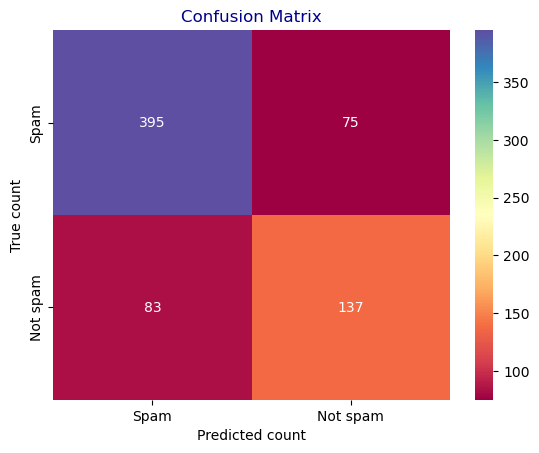

In [33]:
#Plot confusionn matrix in a graph
heatmap = sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Spectral')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())

plt.title('Confusion Matrix', color = 'darkblue')
plt.ylabel('True count')
plt.xlabel('Predicted count')
plt.show()

In [34]:
#KNN model
model = [KNeighborsClassifier(n_neighbors = 5)]

In [35]:
#Report model
for knn in model:
    knn.fit(XTrain, yTrain)
    name = knn.__class__, __name__
    trainPred = knn.predict(XTest)
    accuracy = metrics.accuracy_score(yTest, trainPred)
    
    print("***KNN accuracy***: {:.4%}".format(accuracy))

***KNN accuracy***: 76.2319%


In [36]:
DT.fit(XTrain, yTrain)
print('***Decision Tree accuarcy***: {:.4%}', DT.score(XTest, yTest))

***Decision Tree accuarcy***: {:.4%} 0.7855072463768116
